## Mapping America’s Air: Wrangling 2023 EPA Pollution Data for Geospatial Insight

Author: Kyle Mair



In this project, I set out to explore air pollution trends across the United States in 2023 by merging and cleaning two comprehensive datasets from the U.S. Environmental Protection Agency and Kaggle. My goal was to analyze key pollutants—ozone (O₃), carbon monoxide (CO), sulfur dioxide (SO₂), and nitrogen dioxide (NO₂)—by location and time. I wanted to use the traditional geographical indicators such as city, state and address to connect all data to their correct latitude and longitude coordinates. With these coordinates the data would maintain geological significance and provide precise insights to use for further mapping visualizations and geospatial plotting in Tableau. 

Through data wrangling with Python (Pandas) and visualization in Tableau, I created a unified dataset that reveals the geographical distribution of air quality across the country for all those significant pollutants.


---

In [26]:
import numpy as np
import pandas as pd
import requests
import io
import zipfile
import matplotlib.pyplot as plt

### Gathering The Data


I started off by importing all the necessary libraries. This included the requests library for sending and receiving http requests, the IO library for handling byte data, and the zipfile library for programmatically unzipping files. Through this I was then able to programmatically request the zip file for my first dataset provided by the U.S. Environmental Protection Agency from their Air Quality System Data Mart. The dataset is called "Daily ozone summary data, 2023" (EPA, 2024). Below I requested the data file from the http URL provided, then I stored the response in a variable. I saw the response read back "200" which indicated the request successfully received the data back.


---

In [2]:
url = "https://aqs.epa.gov/aqsweb/airdata/daily_44201_2023.zip"

response = requests.get("https://aqs.epa.gov/aqsweb/airdata/daily_44201_2023.zip")
print(response)

<Response [200]>


---


Next, I used the zipfile library to extract all the content from the byte data zipfile that was received back from the http request. Then I placed the extracted data in a new csv file, then stored the file in a folder called "pollution_data". This would be the folder that would hold all the unzipped file contents. Next, I assigned the csv file "daily_44201_2023.csv" from the "pollution_data" folder to a variable called df1 and observed the dataset structure.


---

In [3]:
with zipfile.ZipFile(io.BytesIO(response.content)) as file_ref:
    file_ref.extractall("pollution_data")

In [4]:
df1 = pd.read_csv('pollution_data/daily_44201_2023.csv')
df1

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,21,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-05-24
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,24,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-05-24
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,35,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-05-24
3,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,50,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-05-24
4,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,44,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-05-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388233,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,24,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,Not in a city,NaN,2024-05-25
388234,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,27,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,Not in a city,NaN,2024-05-25
388235,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,24,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,Not in a city,NaN,2024-05-25
388236,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,31,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,Not in a city,NaN,2024-05-25


---


I was looking to combine this dataset (df1) with a dataset of similar content so I manually downloaded a csv file from Kaggle. This file was called "U.S. Pollution Data 2000-2023" and more information about it and contributors can be found in the references at the end of this article (BrendaSo & Kim, 2023). Below, I assigned this csv dataset to a dataframe variable called df2.


---

In [5]:
df2 = pd.read_csv("pollution_2000_2023.csv")
df2

,Unnamed: 0,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,0,2000-01-01,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,10,37,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,1,2000-01-02,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,10,30,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2,2000-01-03,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,9,15,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,3,2000-01-04,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,9,31,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,4,2000-01-05,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,9,11,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665409,665409,2023-06-26,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.043941,0.050,12,46,...,0,0.0,0.117391,0.3,7,0.0,2.282609,4.3,6,4
665410,665410,2023-06-27,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.046235,0.054,12,50,...,0,0.0,0.091667,0.2,8,0.0,2.283333,5.2,6,5
665411,665411,2023-06-28,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.046588,0.055,7,51,...,0,0.0,0.091667,0.2,6,0.0,2.487500,4.8,19,4
665412,665412,2023-06-29,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Cheyenne,0.048765,0.056,9,54,...,0,0.0,0.052174,0.1,8,0.0,2.086957,4.1,8,4


---


To begin my data wrangling, I planned to merge the two datasets into a single DataFrame before proceeding with data cleaning and assessment. The first dataset, df1, contains daily ozone (O₃) data for the year 2023, collected from monitoring stations across the United States. This dataset records ozone concentrations in parts per million and includes detailed geographic information such as state, county, city, address and precise latitude and longitude coordinates. Each record corresponds to a specific date and includes additional data such as the duration of the measurement interval (8-hour average) and the calculated Air Quality Index (AQI) based on that day’s ozone levels. It was these latitude and longitude coordinates for each record that made this dataset essential to reach my goal of having coordinates for all the pollutants measurements by location. This dataset only had measurements for ozone (O₃). 

The second dataset, df2, also includes records from across the U.S. in 2023, but it extends back to the year 2000. Unlike df1, which focuses solely on the ozone air pollutant, df2 provides measurements for the four major air pollutants I wanted to see the geospacial distribution for: ozone (O₃), carbon monoxide (CO), sulfur dioxide (SO₂), and nitrogen dioxide (NO₂). For each pollutant, it includes daily average values, maximum observed values, the hour in which the maximum occurred, and the corresponding Air Quality Index (AQI) for each pollutant. While df2 does not include longitude and latitude coordinates, it still provides geographic identifiers such as state, county, city, and address along with the date of measurement. This dataset enables multi-pollutant comparisons across locations and time.

The code below shows these discoveries about each dataset


---

In [6]:
df1[['State Name', 'County Name', 'City Name', 'Address','Date Local', 'Parameter Name',
     'Arithmetic Mean', 'Units of Measure', 'Sample Duration', 'AQI', 'Latitude','Longitude' ]]

,State Name,County Name,City Name,Address,Date Local,Parameter Name,Arithmetic Mean,Units of Measure,Sample Duration,AQI,Latitude,Longitude
0,Alabama,Baldwin,Fairhope,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",2023-02-28,Ozone,0.023000,Parts per million,8-HR RUN AVG BEGIN HOUR,21,30.497478,-87.880258
1,Alabama,Baldwin,Fairhope,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",2023-03-01,Ozone,0.025529,Parts per million,8-HR RUN AVG BEGIN HOUR,24,30.497478,-87.880258
2,Alabama,Baldwin,Fairhope,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",2023-03-02,Ozone,0.031412,Parts per million,8-HR RUN AVG BEGIN HOUR,35,30.497478,-87.880258
3,Alabama,Baldwin,Fairhope,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",2023-03-03,Ozone,0.042882,Parts per million,8-HR RUN AVG BEGIN HOUR,50,30.497478,-87.880258
4,Alabama,Baldwin,Fairhope,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",2023-03-04,Ozone,0.037294,Parts per million,8-HR RUN AVG BEGIN HOUR,44,30.497478,-87.880258
...,...,...,...,...,...,...,...,...,...,...,...,...
388233,Country Of Mexico,SONORA,Not in a city,Calle 15 & Venustiano Carranza Water Well #10,2023-12-27,Ozone,0.011941,Parts per million,8-HR RUN AVG BEGIN HOUR,24,32.466389,-114.768611
388234,Country Of Mexico,SONORA,Not in a city,Calle 15 & Venustiano Carranza Water Well #10,2023-12-28,Ozone,0.014118,Parts per million,8-HR RUN AVG BEGIN HOUR,27,32.466389,-114.768611
388235,Country Of Mexico,SONORA,Not in a city,Calle 15 & Venustiano Carranza Water Well #10,2023-12-29,Ozone,0.014647,Parts per million,8-HR RUN AVG BEGIN HOUR,24,32.466389,-114.768611
388236,Country Of Mexico,SONORA,Not in a city,Calle 15 & Venustiano Carranza Water Well #10,2023-12-30,Ozone,0.026000,Parts per million,8-HR RUN AVG BEGIN HOUR,31,32.466389,-114.768611


In [7]:
df2[['State', 'County', 'City', 'Address', 'Date', 'O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean', 'O3 AQI',
     'CO AQI', 'SO2 AQI', 'NO2 AQI']]

,State,County,City,Address,Date,O3 Mean,CO Mean,SO2 Mean,NO2 Mean,O3 AQI,CO AQI,SO2 AQI,NO2 AQI
0,Arizona,Maricopa,Phoenix,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,2000-01-01,0.019765,0.878947,3.000000,19.041667,37,25.0,13.0,46
1,Arizona,Maricopa,Phoenix,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,2000-01-02,0.015882,1.066667,1.958333,22.958333,30,26.0,4.0,34
2,Arizona,Maricopa,Phoenix,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,2000-01-03,0.009353,1.762500,5.250000,38.125000,15,28.0,16.0,48
3,Arizona,Maricopa,Phoenix,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,2000-01-04,0.015882,1.829167,7.083333,40.260870,31,34.0,23.0,72
4,Arizona,Maricopa,Phoenix,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,2000-01-05,0.007353,2.700000,8.708333,48.450000,11,42.0,21.0,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
665409,Wyoming,Laramie,Cheyenne,NCore - North Cheyenne Soccer Complex,2023-06-26,0.043941,0.000000,0.117391,2.282609,46,0.0,0.0,4
665410,Wyoming,Laramie,Cheyenne,NCore - North Cheyenne Soccer Complex,2023-06-27,0.046235,0.000000,0.091667,2.283333,50,0.0,0.0,5
665411,Wyoming,Laramie,Cheyenne,NCore - North Cheyenne Soccer Complex,2023-06-28,0.046588,0.000000,0.091667,2.487500,51,0.0,0.0,4
665412,Wyoming,Laramie,Cheyenne,NCore - North Cheyenne Soccer Complex,2023-06-29,0.048765,0.000000,0.052174,2.086957,54,0.0,0.0,4


---


Describing the datasets and organizing their columns as I have displayed in my code snippets above shows that it would be simple to join the two datasets (df1 and df2) together based off of their State / County / City / Address columns and the dates of their records. By combining the datasets this way I would be left with dates, locations, longitude, latitude, and measurements for each of the four main pollutants I wanted to analyze geographically. Before thoroughly assessing the data and then cleaning the data, I wanted to merge the datasets together first in this way. To do this I had to prep the columns for joining. First, I would make sure their date columns were converted to datetime datatypes. Next, I would standardize the text columns (State, County, City, and Address) to ensure that white space or inconnsistent data entry did not confuse up the join operation.


---

In [8]:
df1['Date Local'] = pd.to_datetime(df1['Date Local'])
df2['Date'] = pd.to_datetime(df2['Date'])

for col in ['State Name', 'County Name', 'City Name', 'Address']:
    df1[col] = df1[col].str.strip().str.lower()

for col in ['State', 'County', 'City', 'Address']:
    df2[col] = df2[col].str.strip().str.lower()

    

---


Now that I had standardized the required columns I created a new dataframe called df_pollution that contained all the data merged on where the State, County, City, Address and Date Columns are the same between the two datasets. As a result I had seamlessly created a dataset that gave longitude and latitude data on the measurements for each record of the four pollutants-ozone (O₃), carbon monoxide (CO), sulfur dioxide (SO₂), and nitrogen dioxide (NO₂)-that I wanted to analyze the geospacial distribution of across the United States.


___

In [9]:
df_pollution = pd.merge(
    df1,
    df2,
    how='inner', 
    left_on=['Date Local', 'Address', 'State Name', 'County Name', 'City Name'],
    right_on=['Date', 'Address', 'State', 'County', 'City']
)

df_pollution

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,1,73,23,44201,1,33.553056,-86.815000,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,19,2.0,-0.087500,0.0,11,0.0,5.237500,16.5,18,15
1,1,73,23,44201,1,33.553056,-86.815000,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,0,3.0,0.329167,0.9,8,0.0,4.975000,9.6,7,8
2,1,73,23,44201,1,33.553056,-86.815000,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,17,2.0,0.000000,0.3,6,0.0,5.462500,9.9,17,8
3,1,73,23,44201,1,33.553056,-86.815000,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,23,6.0,-0.016667,0.6,22,0.0,10.662500,29.6,18,27
4,1,73,23,44201,1,33.553056,-86.815000,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,0,7.0,0.330769,1.0,17,1.0,12.245455,22.1,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15591,56,21,100,44201,1,41.182227,-104.778334,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,0,0.0,0.117391,0.3,7,0.0,2.282609,4.3,6,4
15592,56,21,100,44201,1,41.182227,-104.778334,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,0,0.0,0.091667,0.2,8,0.0,2.283333,5.2,6,5
15593,56,21,100,44201,1,41.182227,-104.778334,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,0,0.0,0.091667,0.2,6,0.0,2.487500,4.8,19,4
15594,56,21,100,44201,1,41.182227,-104.778334,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,0,0.0,0.052174,0.1,8,0.0,2.086957,4.1,8,4


This dataset now had the ability for me to make a geospacial graph in Tableau to create a report for how these pollutants were distributed in 2023. However, the data still needed work to make sure it was usable and minimize any error or difficulty of usability. To handle this I needed to next assess the data for completeness, validity, accuracy, consistency, and uniqueness.



### Assessing The Data
Starting with assessing the data visually, I wanted to see if the two dataframes were joined properly. Below I display the new dataset (df_pollution) and show each state, county, city, address, date record. The "Arithmetic Mean" column in the df_pollution dataframe below was originally the column in the df1 dataframe that showed the ozone (O₃) measurements for that date, and the "O3 Mean" column in the df_pollution dataframe below was originally the column in the df2 dataframe that shows the ozone (O₃) measurements for the date in that record. We can see that these measurements seem to be consistently lining up. We see the same with the "AQI" and the "O3 AQI" column values. This means the dataframes were likely joined properly. I then checked the columns in the dataframe that were most significant to my study to see how they turned out, and it appears they turned out with the information needed.

In [10]:
df_pollution[['State', 'County', 'City', 'Address', 'Date', 'Arithmetic Mean', 'O3 Mean', 'AQI', 'O3 AQI']]

,State,County,City,Address,Date,Arithmetic Mean,O3 Mean,AQI,O3 AQI
0,alabama,jefferson,birmingham,"no. b'ham,sou r.r., 3009 28th st. no.",2023-01-01,0.031588,0.031588,38,38
1,alabama,jefferson,birmingham,"no. b'ham,sou r.r., 3009 28th st. no.",2023-01-02,0.019824,0.019824,21,21
2,alabama,jefferson,birmingham,"no. b'ham,sou r.r., 3009 28th st. no.",2023-01-03,0.021471,0.021471,21,21
3,alabama,jefferson,birmingham,"no. b'ham,sou r.r., 3009 28th st. no.",2023-01-04,0.017235,0.017235,37,37
4,alabama,jefferson,birmingham,"no. b'ham,sou r.r., 3009 28th st. no.",2023-01-05,0.030412,0.030412,38,38
...,...,...,...,...,...,...,...,...,...
15591,wyoming,laramie,cheyenne,ncore - north cheyenne soccer complex,2023-06-26,0.043941,0.043941,46,46
15592,wyoming,laramie,cheyenne,ncore - north cheyenne soccer complex,2023-06-27,0.046235,0.046235,50,50
15593,wyoming,laramie,cheyenne,ncore - north cheyenne soccer complex,2023-06-28,0.046588,0.046588,51,51
15594,wyoming,laramie,cheyenne,ncore - north cheyenne soccer complex,2023-06-29,0.048765,0.048765,54,54


In [11]:
df_pollution[['State', 'County', 'City', 'Address', 'Date', 'Latitude', 'Longitude', 'O3 Mean', 'O3 AQI', 'CO Mean', 'CO AQI',
              'SO2 Mean', 'SO2 AQI', 'NO2 Mean', 'NO2 AQI']]

,State,County,City,Address,Date,Latitude,Longitude,O3 Mean,O3 AQI,CO Mean,CO AQI,SO2 Mean,SO2 AQI,NO2 Mean,NO2 AQI
0,alabama,jefferson,birmingham,"no. b'ham,sou r.r., 3009 28th st. no.",2023-01-01,33.553056,-86.815000,0.031588,38,0.126316,2.0,-0.087500,0.0,5.237500,15
1,alabama,jefferson,birmingham,"no. b'ham,sou r.r., 3009 28th st. no.",2023-01-02,33.553056,-86.815000,0.019824,21,0.137500,3.0,0.329167,0.0,4.975000,8
2,alabama,jefferson,birmingham,"no. b'ham,sou r.r., 3009 28th st. no.",2023-01-03,33.553056,-86.815000,0.021471,21,0.112500,2.0,0.000000,0.0,5.462500,8
3,alabama,jefferson,birmingham,"no. b'ham,sou r.r., 3009 28th st. no.",2023-01-04,33.553056,-86.815000,0.017235,37,0.150000,6.0,-0.016667,0.0,10.662500,27
4,alabama,jefferson,birmingham,"no. b'ham,sou r.r., 3009 28th st. no.",2023-01-05,33.553056,-86.815000,0.030412,38,0.460000,7.0,0.330769,1.0,12.245455,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15591,wyoming,laramie,cheyenne,ncore - north cheyenne soccer complex,2023-06-26,41.182227,-104.778334,0.043941,46,0.000000,0.0,0.117391,0.0,2.282609,4
15592,wyoming,laramie,cheyenne,ncore - north cheyenne soccer complex,2023-06-27,41.182227,-104.778334,0.046235,50,0.000000,0.0,0.091667,0.0,2.283333,5
15593,wyoming,laramie,cheyenne,ncore - north cheyenne soccer complex,2023-06-28,41.182227,-104.778334,0.046588,51,0.000000,0.0,0.091667,0.0,2.487500,4
15594,wyoming,laramie,cheyenne,ncore - north cheyenne soccer complex,2023-06-29,41.182227,-104.778334,0.048765,54,0.000000,0.0,0.052174,0.0,2.086957,4


While continuing my assessment I determine one completeness issue in my dataframe that will need cleaning later on. In my "CBSA Name" column I see there are 405 null values. This column holds statistical significant for geographical groups by structuring the data like "Birmingham-Hoover, AL" where it contains the city name followed by the state. We will need to fix this later on to ensure completeness in the dataset. But I displayed this first issue I found below both prgramatically and visually.

In [12]:
df_pollution.isnull().sum()

State Code               0
County Code              0
Site Num                 0
Parameter Code           0
POC                      0
Latitude                 0
Longitude                0
Datum                    0
Parameter Name           0
Sample Duration          0
Pollutant Standard       0
Date Local               0
Units of Measure         0
Event Type               0
Observation Count        0
Observation Percent      0
Arithmetic Mean          0
1st Max Value            0
1st Max Hour             0
AQI                      0
Method Code              0
Method Name              0
Local Site Name          0
Address                  0
State Name               0
County Name              0
City Name                0
CBSA Name              405
Date of Last Change      0
Unnamed: 0               0
Date                     0
State                    0
County                   0
City                     0
O3 Mean                  0
O3 1st Max Value         0
O3 1st Max Hour          0
O

In [13]:
df_pollution[['State', 'County', 'City', 'Address', 'Date', 'Latitude', 'Longitude', 'O3 Mean', 'O3 AQI', 'CO Mean', 'CO AQI',
              'SO2 Mean', 'SO2 AQI', 'NO2 Mean', 'NO2 AQI','CBSA Name']][df_pollution['CBSA Name'].isnull()]

,State,County,City,Address,Date,Latitude,Longitude,O3 Mean,O3 AQI,CO Mean,CO AQI,SO2 Mean,SO2 AQI,NO2 Mean,NO2 AQI,CBSA Name
6851,maine,aroostook,presque isle,"8 northern road, presque isle, me 04769",2023-01-01,46.696431,-68.033006,0.023588,26,0.252632,5.0,0.000000,0.0,2.162500,7,NaN
6852,maine,aroostook,presque isle,"8 northern road, presque isle, me 04769",2023-01-02,46.696431,-68.033006,0.020176,27,0.170833,2.0,0.004167,0.0,1.600000,3,NaN
6853,maine,aroostook,presque isle,"8 northern road, presque isle, me 04769",2023-01-03,46.696431,-68.033006,0.014417,16,0.208333,3.0,0.033333,0.0,2.875000,6,NaN
6854,maine,aroostook,presque isle,"8 northern road, presque isle, me 04769",2023-01-30,46.696431,-68.033006,0.024500,25,0.200000,2.0,0.000000,0.0,6.833333,12,NaN
6855,maine,aroostook,presque isle,"8 northern road, presque isle, me 04769",2023-01-31,46.696431,-68.033006,0.031529,32,0.200000,2.0,0.033333,0.0,4.354167,14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7426,maryland,garrett,grantsville,"piney run, frostburg reservoir, finzel",2023-09-26,39.705950,-79.012000,0.016500,17,0.129412,2.0,0.065217,0.0,0.726087,1,NaN
7427,maryland,garrett,grantsville,"piney run, frostburg reservoir, finzel",2023-09-27,39.705950,-79.012000,0.025765,26,0.233333,3.0,0.091304,0.0,1.315385,3,NaN
7428,maryland,garrett,grantsville,"piney run, frostburg reservoir, finzel",2023-09-28,39.705950,-79.012000,0.028824,31,0.216667,3.0,0.154167,0.0,2.195833,3,NaN
7429,maryland,garrett,grantsville,"piney run, frostburg reservoir, finzel",2023-09-29,39.705950,-79.012000,0.020765,29,0.170833,3.0,0.060000,0.0,2.225000,2,NaN


Next, I assessed that there were certain columns in the df_pollution dataframe that did not need to be there anymore. Columns like "Unnamed: 0" just did not have any significance to the dataset and produced a data tidiness issue. Other columns like "Parameter Code" and "Parameter Name" produced a data consistency issue because these were columns that were from the df1 dataframe where there was only the pollutant ozone (O₃) they were representing. However, these columns now don't consistently represent the same concept across the merged dataset because there are multiple pollutants that were merged in from the df2 dataframe. These are examples of columns that should be dropped to improve memory and form a cleaner dataframe.

In [14]:
df_pollution[['POC','Unnamed: 0', 'Parameter Code', 'Datum', 'Parameter Name', 'Pollutant Standard', 'Date Local',
             'Event Type','Observation Count', 'Observation Percent', 'Arithmetic Mean', '1st Max Value', '1st Max Hour',
             'AQI', 'Method Code', 'Method Name', 'State Name', 'County Name', 'City Name', 'Date of Last Change']]

,POC,Unnamed: 0,Parameter Code,Datum,Parameter Name,Pollutant Standard,Date Local,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code,Method Name,State Name,County Name,City Name,Date of Last Change
0,1,649748,44201,WGS84,Ozone,Ozone 8-hour 2015,2023-01-01,None,17,100.0,0.031588,0.041,9,38,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,alabama,jefferson,birmingham,2024-05-24
1,1,649749,44201,WGS84,Ozone,Ozone 8-hour 2015,2023-01-02,None,17,100.0,0.019824,0.023,22,21,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,alabama,jefferson,birmingham,2024-05-24
2,1,649750,44201,WGS84,Ozone,Ozone 8-hour 2015,2023-01-03,None,17,100.0,0.021471,0.023,22,21,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,alabama,jefferson,birmingham,2024-05-24
3,1,649751,44201,WGS84,Ozone,Ozone 8-hour 2015,2023-01-04,None,17,100.0,0.017235,0.040,9,37,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,alabama,jefferson,birmingham,2024-05-24
4,1,649752,44201,WGS84,Ozone,Ozone 8-hour 2015,2023-01-05,None,17,100.0,0.030412,0.041,9,38,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,alabama,jefferson,birmingham,2024-05-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15591,1,665409,44201,WGS84,Ozone,Ozone 8-hour 2015,2023-06-26,None,17,100.0,0.043941,0.050,12,46,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,wyoming,laramie,cheyenne,2024-05-25
15592,1,665410,44201,WGS84,Ozone,Ozone 8-hour 2015,2023-06-27,None,17,100.0,0.046235,0.054,12,50,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,wyoming,laramie,cheyenne,2024-05-25
15593,1,665411,44201,WGS84,Ozone,Ozone 8-hour 2015,2023-06-28,None,17,100.0,0.046588,0.055,7,51,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,wyoming,laramie,cheyenne,2024-05-25
15594,1,665412,44201,WGS84,Ozone,Ozone 8-hour 2015,2023-06-29,None,17,100.0,0.048765,0.056,9,54,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,wyoming,laramie,cheyenne,2024-05-25


In [15]:
df_pollution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15596 entries, 0 to 15595
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   State Code           15596 non-null  int64         
 1   County Code          15596 non-null  int64         
 2   Site Num             15596 non-null  int64         
 3   Parameter Code       15596 non-null  int64         
 4   POC                  15596 non-null  int64         
 5   Latitude             15596 non-null  float64       
 6   Longitude            15596 non-null  float64       
 7   Datum                15596 non-null  object        
 8   Parameter Name       15596 non-null  object        
 9   Sample Duration      15596 non-null  object        
 10  Pollutant Standard   15596 non-null  object        
 11  Date Local           15596 non-null  datetime64[ns]
 12  Units of Measure     15596 non-null  object        
 13  Event Type           15596 non-

### Cleaning The Data

In the assessing stage in the previous section I identified the main issues in the df_pollution dataframe that needed to be handled in the cleaning phase. Those issues were: 

1. *Handling the null values in the "CBSA Name" column.*
2. *Removing the unnecessary columns in the data for better structure.*

I want to start by looking at the "CBSA Name" column values below. These values are definetly more complex than just a "State, City" format. It would not be very accurate to try to fill in the null values by just imputing the State and City for each record. CBSA names sometimes cover multiple cities and span state lines. These values are very specific statistic regional identifiers at times. I do not plan to largely use this column in my report, and I do not want to drop the values to maintain as many records as possible, so for now I will just replace the null values with: "Uknown". I implemented this technique simple function below.

In [16]:
df_pollution['CBSA Name'].value_counts()

Salt Lake City, UT                              1324
Riverside-San Bernardino-Ontario, CA             851
San Francisco-Oakland-Hayward, CA                798
Los Angeles-Long Beach-Anaheim, CA               724
Washington-Arlington-Alexandria, DC-VA-MD-WV     672
Denver-Aurora-Lakewood, CO                       656
New York-Newark-Jersey City, NY-NJ-PA            437
Phoenix-Mesa-Scottsdale, AZ                      416
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD      365
Providence-Warwick, RI-MA                        352
Richmond, VA                                     352
Santa Maria-Santa Barbara, CA                    311
Boston-Cambridge-Newton, MA-NH                   298
Albuquerque, NM                                  274
Charlotte-Concord-Gastonia, NC-SC                273
Minneapolis-St. Paul-Bloomington, MN-WI          271
Raleigh, NC                                      238
Tulsa, OK                                        237
Indianapolis-Carmel-Anderson, IN              

In [17]:
df_pollution['CBSA Name'].fillna('Unknown', inplace=True)


In [18]:
df_pollution['CBSA Name'].isnull().any()

False

The output of "False" above indicates there are no more null values in the 'CSBSA Name' field.

Next, I dropped the columns that were not needed in the df_pollution dataframe for tidyness and consistency. Finally, I rearranged the columns in the df_pollution dataframe for easiest usability and visibility.

In [19]:
df_pollution.drop(['POC','Unnamed: 0', 'Parameter Code', 'Datum', 'Parameter Name', 'Pollutant Standard', 'Date Local',
             'Event Type','Observation Count', 'Observation Percent', 'Arithmetic Mean', '1st Max Value', '1st Max Hour',
             'AQI', 'Method Code', 'Method Name', 'State Name', 'County Name', 'City Name', 'Date of Last Change'], axis=1, inplace=True)


In [20]:
df_pollution = df_pollution[['Date','State', 'State Code', 'County', 'County Code', 'City', 'Address','Local Site Name',
                   'Site Num', 'CBSA Name', 'Latitude','Longitude', 'Sample Duration', 'Units of Measure',
                   'O3 Mean','O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'CO Mean','CO 1st Max Value',
                   'CO 1st Max Hour', 'CO AQI', 'SO2 Mean','SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
                   'NO2 Mean','NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI']]
df_pollution


,Date,State,State Code,County,County Code,City,Address,Local Site Name,Site Num,CBSA Name,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2023-01-01,alabama,1,jefferson,73,birmingham,"no. b'ham,sou r.r., 3009 28th st. no.",North Birmingham,23,"Birmingham-Hoover, AL",...,19,2.0,-0.087500,0.0,11,0.0,5.237500,16.5,18,15
1,2023-01-02,alabama,1,jefferson,73,birmingham,"no. b'ham,sou r.r., 3009 28th st. no.",North Birmingham,23,"Birmingham-Hoover, AL",...,0,3.0,0.329167,0.9,8,0.0,4.975000,9.6,7,8
2,2023-01-03,alabama,1,jefferson,73,birmingham,"no. b'ham,sou r.r., 3009 28th st. no.",North Birmingham,23,"Birmingham-Hoover, AL",...,17,2.0,0.000000,0.3,6,0.0,5.462500,9.9,17,8
3,2023-01-04,alabama,1,jefferson,73,birmingham,"no. b'ham,sou r.r., 3009 28th st. no.",North Birmingham,23,"Birmingham-Hoover, AL",...,23,6.0,-0.016667,0.6,22,0.0,10.662500,29.6,18,27
4,2023-01-05,alabama,1,jefferson,73,birmingham,"no. b'ham,sou r.r., 3009 28th st. no.",North Birmingham,23,"Birmingham-Hoover, AL",...,0,7.0,0.330769,1.0,17,1.0,12.245455,22.1,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15591,2023-06-26,wyoming,56,laramie,21,cheyenne,ncore - north cheyenne soccer complex,Cheyenne NCore,100,"Cheyenne, WY",...,0,0.0,0.117391,0.3,7,0.0,2.282609,4.3,6,4
15592,2023-06-27,wyoming,56,laramie,21,cheyenne,ncore - north cheyenne soccer complex,Cheyenne NCore,100,"Cheyenne, WY",...,0,0.0,0.091667,0.2,8,0.0,2.283333,5.2,6,5
15593,2023-06-28,wyoming,56,laramie,21,cheyenne,ncore - north cheyenne soccer complex,Cheyenne NCore,100,"Cheyenne, WY",...,0,0.0,0.091667,0.2,6,0.0,2.487500,4.8,19,4
15594,2023-06-29,wyoming,56,laramie,21,cheyenne,ncore - north cheyenne soccer complex,Cheyenne NCore,100,"Cheyenne, WY",...,0,0.0,0.052174,0.1,8,0.0,2.086957,4.1,8,4


At this point my dataset was clean enough to use for creating visualization and pulling insights through charts. So next, I saved my df_pollution dataframe as a csv file called "us_geo_pollution" and took it to Tableau to create a geographical chart. That chart will be better displayed in my linked in article. And the Tableau file will be accessible in this same git repository. Below I will include two different charts I made. The first chart shows the means of the different pollutants by State, and the second shows the means of the different pollutants by Date.

In [24]:
df_pollution.to_csv("us_geo_pollution.csv", index=False)

In [32]:
df_poll_address = df_pollution.groupby('State').mean(numeric_only=True)
df_poll_dates = df_pollution.groupby(df_pollution['Date'].dt.month).mean(numeric_only=True)

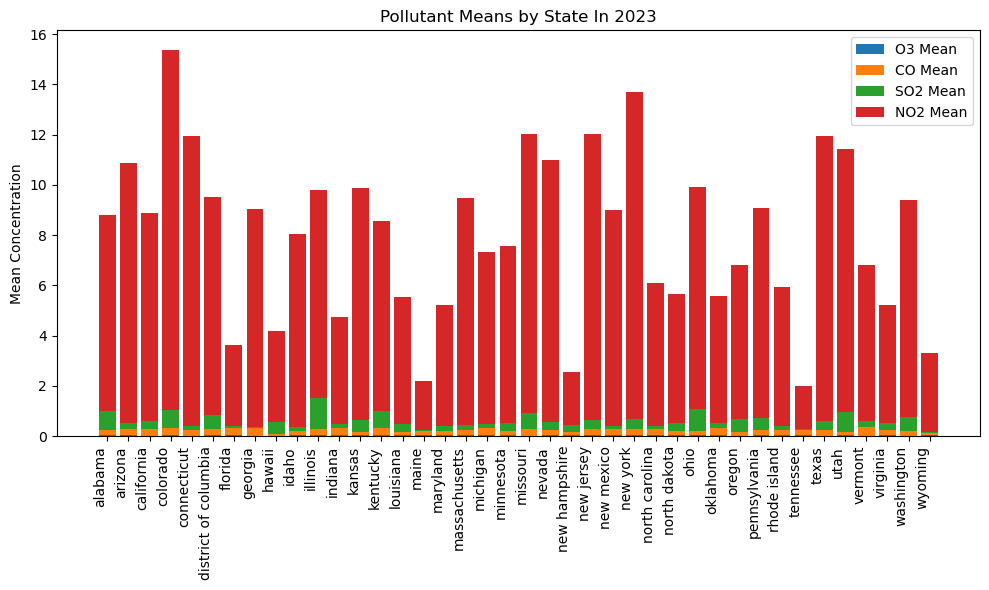

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))

states = df_poll_address.index
ind = range(len(states))  


o3 = df_poll_address['O3 Mean']
co = df_poll_address['CO Mean']
so2 = df_poll_address['SO2 Mean']
no2 = df_poll_address['NO2 Mean']


p1 = ax.bar(ind, o3, label='O3 Mean')
p2 = ax.bar(ind, co, bottom=o3, label='CO Mean')
p3 = ax.bar(ind, so2, bottom=o3+co, label='SO2 Mean')
p4 = ax.bar(ind, no2, bottom=o3+co+so2, label='NO2 Mean')


ax.set_xticks(ind)
ax.set_xticklabels(states, rotation=90, ha='right')
ax.set_ylabel('Mean Concentration')
ax.set_title('Pollutant Means by State In 2023')
ax.legend()

plt.tight_layout()
plt.savefig('means_by_state.png')

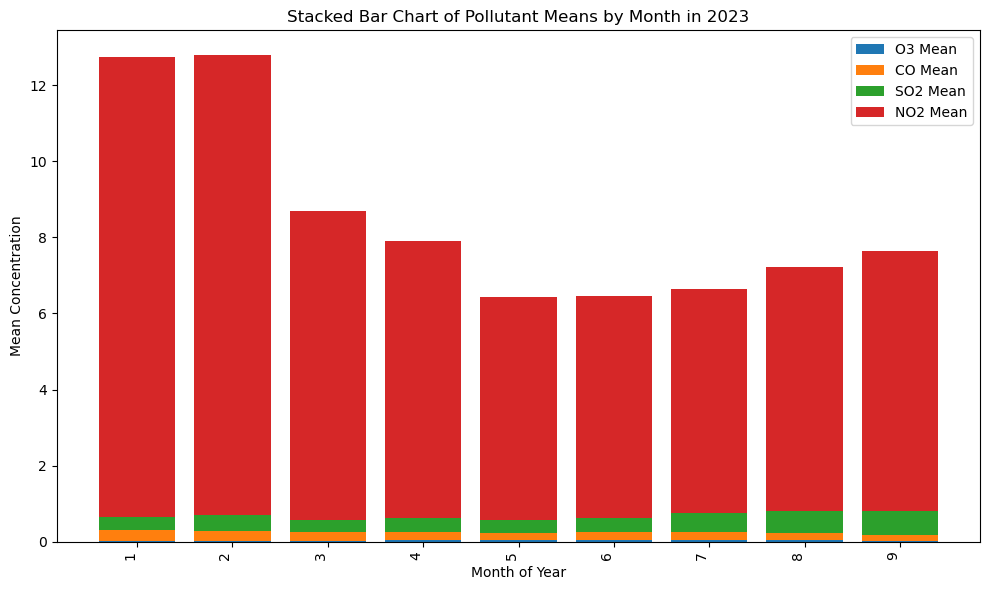

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

dates = df_poll_dates.index
ind = range(len(dates))  


o3 = df_poll_dates['O3 Mean']
co = df_poll_dates['CO Mean']
so2 = df_poll_dates['SO2 Mean']
no2 = df_poll_dates['NO2 Mean']


p1 = ax.bar(ind, o3, label='O3 Mean')
p2 = ax.bar(ind, co, bottom=o3, label='CO Mean')
p3 = ax.bar(ind, so2, bottom=o3+co, label='SO2 Mean')
p4 = ax.bar(ind, no2, bottom=o3+co+so2, label='NO2 Mean')


ax.set_xticks(ind)
ax.set_xticklabels(dates, rotation=90, ha='right')
ax.set_ylabel('Mean Concentration')
ax.set_xlabel('Month of Year')
ax.set_title('Stacked Bar Chart of Pollutant Means by Month in 2023')
ax.legend()

plt.tight_layout()

# References

1. df1 - U.S. Environmental Protection Agency. (2024, May 24). Daily ozone summary data, 2023 (parameter code 44201) [Data set]. EPA Air Quality System (AQS) Data Mart. https://aqs.epa.gov/aqsweb/airdata/daily_44201_2023.zip

---

2. df2 - BrendaSo, & Kim, A. (2023). U.S. Pollution Data 2000–2023: CO, NO2, O3, and SO2 pollution data in the USA between 2000–2023 from the EPA [Data set]. Kaggle. https://www.kaggle.com/datasets/guslovesmath/us-pollution-data-200-to-2022